# Implement Cat Swarm Optimization to minimize the sphere function f(x) =  summation i=1 to n xi^2

Iteration 1/50 - Best Fitness: 951.021071
Iteration 2/50 - Best Fitness: 613.446850
Iteration 3/50 - Best Fitness: 337.368867
Iteration 4/50 - Best Fitness: 170.575643
Iteration 5/50 - Best Fitness: 113.067177
Iteration 6/50 - Best Fitness: 18.541681
Iteration 7/50 - Best Fitness: 18.541681
Iteration 8/50 - Best Fitness: 18.541681
Iteration 9/50 - Best Fitness: 18.541681
Iteration 10/50 - Best Fitness: 18.541681
Iteration 11/50 - Best Fitness: 18.541681
Iteration 12/50 - Best Fitness: 6.646942
Iteration 13/50 - Best Fitness: 6.646942
Iteration 14/50 - Best Fitness: 6.646942
Iteration 15/50 - Best Fitness: 4.569185
Iteration 16/50 - Best Fitness: 4.569185
Iteration 17/50 - Best Fitness: 4.569185
Iteration 18/50 - Best Fitness: 4.569185
Iteration 19/50 - Best Fitness: 4.569185
Iteration 20/50 - Best Fitness: 4.569185
Iteration 21/50 - Best Fitness: 4.569185
Iteration 22/50 - Best Fitness: 4.238255
Iteration 23/50 - Best Fitness: 4.238255
Iteration 24/50 - Best Fitness: 4.238255
Iteration

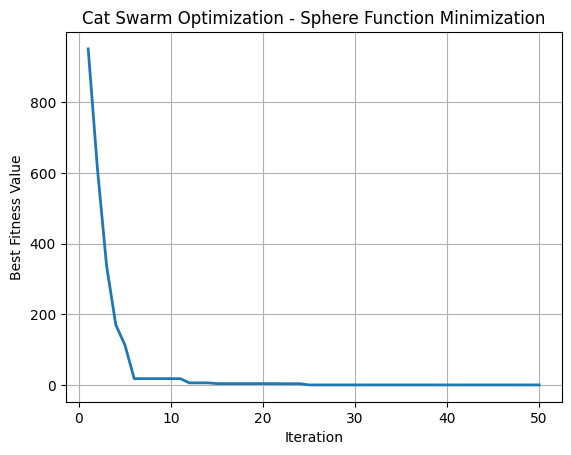

In [4]:
import random
import math
import copy
import matplotlib.pyplot as plt

def sphere_function(position):
    """The sphere function to minimize."""
    return sum(x**2 for x in position)

class Cat:
    """Represents a cat in the Cat Swarm Optimization."""
    def __init__(self, dimension, min_bounds, max_bounds, max_velocity):
        self.position = [random.uniform(min_bounds, max_bounds) for _ in range(dimension)]
        self.velocity = [random.uniform(-max_velocity, max_velocity) for _ in range(dimension)]
        self.fitness = sphere_function(self.position)
        self.mode = 'seeking'  # Initial mode
        self.best_personal_position = copy.deepcopy(self.position)
        self.best_personal_fitness = self.fitness

class CatSwarmOptimization:
    """Main CSO algorithm implementation."""
    def __init__(self, num_cats, dimension, min_bounds, max_bounds, max_velocity, mr, smp, srd, cdc, max_iterations):
        self.num_cats = num_cats
        self.dimension = dimension
        self.min_bounds = min_bounds
        self.max_bounds = max_bounds
        self.max_velocity = max_velocity
        self.mr = mr  # Mixture Ratio
        self.smp = smp  # Seeking Memory Pool
        self.srd = srd  # Seeking Range of selected Dimension
        self.cdc = cdc  # Counts of Dimension to Change (ratio)
        self.max_iterations = max_iterations
        self.cats = []
        self.global_best_position = [0.0] * self.dimension
        self.global_best_fitness = float('inf')
        self.fitness_history = []  # store best fitness per iteration

    def initialize_cats(self):
        """Creates the initial population of cats."""
        for _ in range(self.num_cats):
            cat = Cat(self.dimension, self.min_bounds, self.max_bounds, self.max_velocity)
            self.cats.append(cat)
            if cat.fitness < self.global_best_fitness:
                self.global_best_fitness = cat.fitness
                self.global_best_position = copy.deepcopy(cat.position)

    def seeking_mode(self, cat):
        """Applies the seeking mode process to a cat."""
        j = self.smp
        candidate_positions = [copy.deepcopy(cat.position)]  # include current position

        for _ in range(j - 1):
            temp_pos = copy.deepcopy(cat.position)
            dims_to_change = random.sample(range(self.dimension), int(self.cdc * self.dimension))
            for dim in dims_to_change:
                if random.random() < 0.5:
                    temp_pos[dim] += random.random() * self.srd * (self.max_bounds - self.min_bounds)
                else:
                    temp_pos[dim] -= random.random() * self.srd * (self.max_bounds - self.min_bounds)
                temp_pos[dim] = max(self.min_bounds, min(self.max_bounds, temp_pos[dim]))
            candidate_positions.append(temp_pos)

        candidate_fitnesses = [sphere_function(pos) for pos in candidate_positions]
        
        # Calculate selection probabilities
        if all(f == candidate_fitnesses[0] for f in candidate_fitnesses):
            probabilities = [1.0 / len(candidate_fitnesses)] * len(candidate_fitnesses)
        else:
            max_fit = max(candidate_fitnesses)
            min_fit = min(candidate_fitnesses)
            probabilities = [(abs(f - max_fit) / (max_fit - min_fit)) for f in candidate_fitnesses]
            sum_probs = sum(probabilities)
            probabilities = [p / sum_probs for p in probabilities]

        selected_index = random.choices(range(len(candidate_positions)), probabilities)[0]
        cat.position = copy.deepcopy(candidate_positions[selected_index])
        cat.fitness = candidate_fitnesses[selected_index]

    def tracing_mode(self, cat):
        """Applies the tracing mode process to a cat."""
        c1 = 2.0
        r1 = random.random()
        for dim in range(self.dimension):
            cat.velocity[dim] = cat.velocity[dim] + c1 * r1 * (self.global_best_position[dim] - cat.position[dim])
            cat.velocity[dim] = max(-self.max_velocity, min(self.max_velocity, cat.velocity[dim]))
            cat.position[dim] += cat.velocity[dim]
            cat.position[dim] = max(self.min_bounds, min(self.max_bounds, cat.position[dim]))
        cat.fitness = sphere_function(cat.position)

    def solve(self):
        """Runs the CSO algorithm."""
        self.initialize_cats()
        for iteration in range(self.max_iterations):
            # Update global best
            for cat in self.cats:
                if cat.fitness < self.global_best_fitness:
                    self.global_best_fitness = cat.fitness
                    self.global_best_position = copy.deepcopy(cat.position)

            # Assign modes
            num_tracing = int(self.num_cats * self.mr)
            tracing_cats = random.sample(self.cats, num_tracing)
            for cat in self.cats:
                cat.mode = 'tracing' if cat in tracing_cats else 'seeking'

            # Move cats
            for cat in self.cats:
                if cat.mode == 'seeking':
                    self.seeking_mode(cat)
                else:
                    self.tracing_mode(cat)

            # Store fitness history
            self.fitness_history.append(self.global_best_fitness)
            print(f"Iteration {iteration + 1}/{self.max_iterations} - Best Fitness: {self.global_best_fitness:.6f}")

        return self.global_best_position, self.global_best_fitness

# --- Example Usage ---
NUM_CATS = 50
DIMENSION = 3
MIN_BOUNDS = -100.0
MAX_BOUNDS = 100.0
MAX_VELOCITY = 10.0
MR = 0.75  # Mixture Ratio
SMP = 5 
SRD = 0.1       
CDC = 0.8       
MAX_ITERATIONS = 50

cso = CatSwarmOptimization(NUM_CATS, DIMENSION, MIN_BOUNDS, MAX_BOUNDS, MAX_VELOCITY, MR, SMP, SRD, CDC, MAX_ITERATIONS)
best_position, best_fitness = cso.solve()

print("\nOptimization Complete!")
print(f"Optimal position found: {best_position}")
print(f"Minimum fitness value (sphere function): {best_fitness:.6f}")

# --- Plot convergence graph ---
plt.plot(range(1, MAX_ITERATIONS + 1), cso.fitness_history, linewidth=2)
plt.title("Cat Swarm Optimization - Sphere Function Minimization")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness Value")
plt.grid(True)
plt.show()
